# CURE - Clustering Using REpresentatives

# Exploratory Data Analysis, Increasing Dataset Cardinality and Outlier Insertion

This notebook is dedicated to exploring the data used during our experiments with our CURE clustering algorithm implementation and inserting outliers.

The algorithm implementation was largerly inspired by [saurabhkumar2015](https://github.com/saurabhkumar2015)'s [repository](https://github.com/saurabhkumar2015/CureAlgorithm).

Happy reading and feel free to contact us for any further details.

We import all needed libraries we are going to use.

In [1]:
import os
import filecmp
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
import numpy as np
import pandas as pd

## Exploratory Data Analysis

We begin by exploring our data. We split this section into two parts, one for each dataset used.

### Data size 1

#### The dataset contains a list of identical files

First, we will prove our datasets contain duplicate files. Duplicates cannot be inherently addressed using the CURE algorithm, due to the use of data structures, such as the heap and the KD tree.

Both datasets contain a list of 100 files.

In [2]:
os.listdir('datasets/data_size1/')

['data41.txt',
 'data95.txt',
 'data91.txt',
 'data2.txt',
 'data40.txt',
 'data52.txt',
 'data78.txt',
 'data92.txt',
 'data62.txt',
 'data63.txt',
 'data30.txt',
 'data85.txt',
 'data35.txt',
 'data99.txt',
 'data6.txt',
 'data20.txt',
 'data28.txt',
 'data83.txt',
 'data9.txt',
 'data11.txt',
 'data37.txt',
 'data70.txt',
 'data75.txt',
 'data29.txt',
 'data94.txt',
 'data51.txt',
 'data76.txt',
 'data24.txt',
 'data19.txt',
 'data65.txt',
 'data23.txt',
 'data27.txt',
 'data49.txt',
 'data80.txt',
 'data88.txt',
 'data68.txt',
 'data73.txt',
 'data84.txt',
 'data38.txt',
 'data7.txt',
 'data72.txt',
 'data48.txt',
 'data100.txt',
 'data64.txt',
 'data36.txt',
 'data18.txt',
 'data59.txt',
 'data45.txt',
 'data57.txt',
 'data12.txt',
 'data79.txt',
 'data4.txt',
 'data47.txt',
 'data96.txt',
 'data93.txt',
 'data26.txt',
 'data61.txt',
 'data50.txt',
 'data67.txt',
 'data82.txt',
 'data60.txt',
 'data39.txt',
 'data21.txt',
 'data54.txt',
 'data44.txt',
 'data66.txt',
 'data55.txt',

In [3]:
len(os.listdir('datasets/data_size1/'))

100

Files are identical. And we can prove this using several ways.

In [4]:
filecmp.cmp('datasets/data_size1/data1.txt', 'datasets/data_size1/data2.txt')

True

In [5]:
!cmp datasets/data_size1/data5.txt datasets/data_size1/data86.txt

In [6]:
!diff datasets/data_size1/data53.txt datasets/data_size1/data39.txt

#### Dataset file line count

Each file in the first dataset contains 5725 lines (2-d points).

In [7]:
!wc -l datasets/data_size1/data1.txt

5725 datasets/data_size1/data1.txt


All points are unique.

In [8]:
!sort < datasets/data_size1/data1.txt | uniq | wc -l

5725


#### Dataset statistics

Then we will look at some dataset statistics, such as the mean, the standard deviation and the covariance, and we will plot our data in order to better understand them.

We load our data.

In [9]:
data1 = np.genfromtxt('datasets/data_size1/data1.txt', delimiter=',')
data1.shape

(5725, 2)

In [10]:
data1[:5]

array([[ 0.31877, -1.3077 ],
       [ 1.409  ,  1.4172 ],
       [ 0.6715 , -1.2075 ],
       [ 0.71724,  1.6302 ],
       [ 0.48889,  1.0347 ]])

What are some statistics?

In [11]:
data1_mean = data1.mean(axis=0)
data1_std = data1.std(axis=0)
data1_cov = np.cov(data1.T)

print("Mean:", 
      ''.join(["\n   dim " + str(dim) + ": " + str(data1_mean[dim]) for dim in range(data1_mean.shape[0])]))
print("Standard deviation:",
     ''.join(["\n   dim " + str(dim) + ": " + str(data1_std[dim]) for dim in range(data1_std.shape[0])]))
print("Covariance:",
     ''.join(["\n   dim " + str(dim) + ": " + str(data1_cov[dim]) for dim in range(data1_cov.shape[0])]))

Mean: 
   dim 0: 0.025337809257641914
   dim 1: 0.01363783096943233
Standard deviation: 
   dim 0: 0.9421109529640683
   dim 1: 0.9084874541688598
Covariance: 
   dim 0: [0.88772811 0.0327012 ]
   dim 1: [0.0327012  0.82549365]


Let's plot the distribution for each dimension.

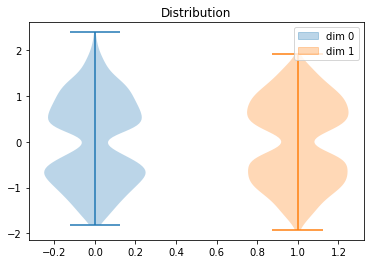

In [12]:
fig, ax = plt.subplots()
labels = []
for i in range(data1.shape[1]):
    plot = ax.violinplot(dataset=data1[:,i], positions=[i])
    color = plot["bodies"][0].get_facecolor().flatten()
    labels.append((patches.Patch(color=color), "dim " + str(i)))
plt.title('Distribution')
plt.legend(*zip(*labels))
plt.show()

Finally, and most importantly, let's take a look at our data shape. As you can see, we can distinguish 5 different clusters, in the shape of pentagons.

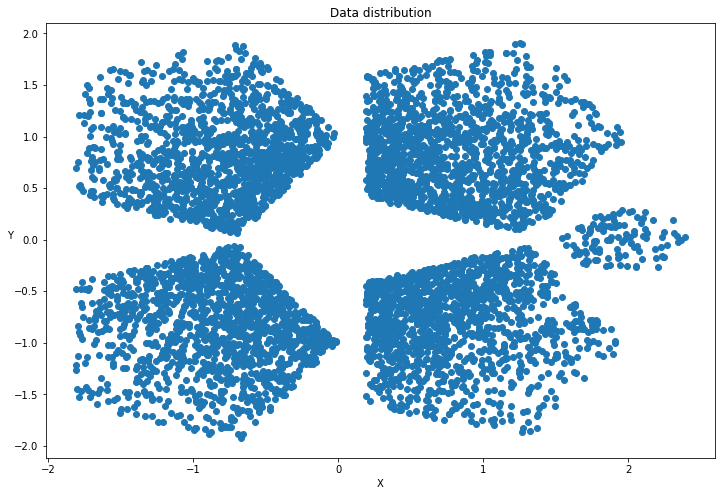

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(data1[:,0], data1[:,1])
plt.title('Data distribution')
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.show()

### Data size 2

We perform a similar procedure for our second dataset, proving in the meanwhile the same points.

In a sense, our second dataset is simply a denser version of the first one, with the same statistics and attributes.

#### The dataset contains a list of identical files

In [14]:
os.listdir('datasets/data_size2/')

['data41.txt',
 'data95.txt',
 'data91.txt',
 'data2.txt',
 'data40.txt',
 'data52.txt',
 'data78.txt',
 'data92.txt',
 'data62.txt',
 'data63.txt',
 'data30.txt',
 'data85.txt',
 'data35.txt',
 'data99.txt',
 'data6.txt',
 'data20.txt',
 'data28.txt',
 'data83.txt',
 'data9.txt',
 'data11.txt',
 'data37.txt',
 'data70.txt',
 'data75.txt',
 'data29.txt',
 'data94.txt',
 'data51.txt',
 'data76.txt',
 'data24.txt',
 'data19.txt',
 'data65.txt',
 'data23.txt',
 'data27.txt',
 'data49.txt',
 'data80.txt',
 'data88.txt',
 'data68.txt',
 'data73.txt',
 'data84.txt',
 'data38.txt',
 'data7.txt',
 'data72.txt',
 'data48.txt',
 'data100.txt',
 'data64.txt',
 'data36.txt',
 'data18.txt',
 'data59.txt',
 'data45.txt',
 'data57.txt',
 'data12.txt',
 'data79.txt',
 'data4.txt',
 'data47.txt',
 'data96.txt',
 'data93.txt',
 'data26.txt',
 'data61.txt',
 'data50.txt',
 'data67.txt',
 'data82.txt',
 'data60.txt',
 'data39.txt',
 'data21.txt',
 'data54.txt',
 'data44.txt',
 'data66.txt',
 'data55.txt',

In [15]:
len(os.listdir('datasets/data_size2/'))

100

In [16]:
filecmp.cmp('datasets/data_size2/data1.txt', 'datasets/data_size2/data2.txt')

True

In [17]:
!cmp datasets/data_size2/data5.txt datasets/data_size2/data86.txt

In [18]:
!diff datasets/data_size2/data53.txt datasets/data_size2/data39.txt

#### Dataset file line count

In [19]:
!wc -l datasets/data_size2/data1.txt

16924 datasets/data_size2/data1.txt


In [20]:
!sort < datasets/data_size2/data1.txt | uniq | wc -l

16924


#### Dataset statistics

In [21]:
data2 = np.genfromtxt('datasets/data_size2/data1.txt', delimiter=',')
data2.shape

(16924, 2)

In [22]:
data2[:5]

array([[ 0.31877, -1.3077 ],
       [ 1.409  ,  1.4172 ],
       [ 0.6715 , -1.2075 ],
       [ 0.71724,  1.6302 ],
       [ 0.48889,  1.0347 ]])

In [23]:
data2_mean = data2.mean(axis=0)
data2_std = data2.std(axis=0)
data2_cov = np.cov(data2.T)

print("Mean:", 
      ''.join(["\n   dim " + str(dim) + ": " + str(data2_mean[dim]) for dim in range(data2_mean.shape[0])]))
print("Standard deviation:",
     ''.join(["\n   dim " + str(dim) + ": " + str(data2_std[dim]) for dim in range(data2_std.shape[0])]))
print("Covariance:",
     ''.join(["\n   dim " + str(dim) + ": " + str(data2_cov[dim]) for dim in range(data2_cov.shape[0])]))

Mean: 
   dim 0: 0.013879523670527154
   dim 1: 0.004446126613093834
Standard deviation: 
   dim 0: 0.9466540290031316
   dim 1: 0.913283878226286
Covariance: 
   dim 0: [ 8.96206805e-01 -3.17511985e-04]
   dim 1: [-3.17511985e-04  8.34136729e-01]


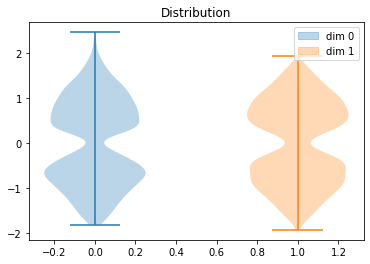

In [24]:
fig, ax = plt.subplots()
labels = []
for i in range(data2.shape[1]):
    plot = ax.violinplot(dataset=data2[:,i], positions=[i])
    color = plot["bodies"][0].get_facecolor().flatten()
    labels.append((patches.Patch(color=color), "dim " + str(i)))
plt.title('Distribution')
plt.legend(*zip(*labels))
plt.show()

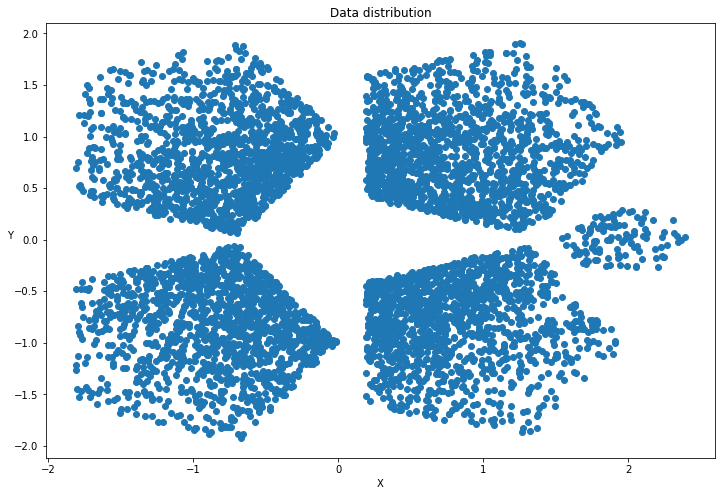

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(data1[:,0], data1[:,1])
plt.title('Data distribution')
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.show()

# Increase dataset cardinality

In order to test the scalability of our algorithms, a large amount of data points is necessary. The two datasets contain 5725 and 16924 data points, respectively, which is insufficient for measuring the performance of our CURE clustering implementation.

We dedicate this section to increasing the number of data points of our datasets by 10, 30 and 100 times, creating 3 new separate datasets for each existing dataset. We do this by replicating the points in our datasets and adding a very small amount of noise from a uniform distribution to each copy.

This will help us compare against different numbers of points and increase the quality of our measurements, while maintaining the shape of our data.

We create a function for that reason, that will repeat the points in our dataset by a specified amount and add a random amount of noise to them.

At the end, the original points, along with the replicated points, will be returned in a concatenated array.

In [26]:
def increase_cardinality(data, factor):
    data_ = np.repeat(data, factor - 1, axis=0)
    noise = np.random.uniform(low=-1, high=1, size=data_.shape) * 4e-2
    data_ += noise
    return np.concatenate((data, data_), axis=0).round(5)

### Data size 1

We create a dictionary of the new data for different cardinalities.

In [27]:
duplication = [10, 30, 100]

data1_cardinalities = {}
for f in duplication:
    data1_cardinalities[f] = increase_cardinality(data1, f)

Let's take a look at the shape of the data for cardinality multiplied by 30.

data1_30 shape: (171750, 2)


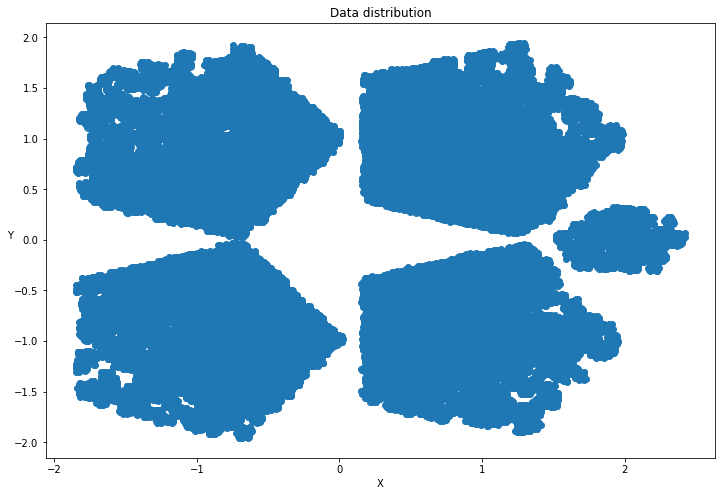

In [28]:
data1_30 = data1_cardinalities[30]
print('data1_30 shape:', data1_30.shape)

plt.figure(figsize=(12,8))
plt.scatter(data1_30[:,0], data1_30[:,1])
plt.title('Data distribution')
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.show()

We save the new, higher-cardinality data.

In [29]:
for card, data1_ in data1_cardinalities.items():
    pd.DataFrame(data1_).to_csv('datasets/data1_' + str(card) + '.txt', header=False, index=False)

### Data size 2

We perform a similar procedure for the second dataset.

In [30]:
duplication = [10, 30, 100]

data2_cardinalities = {}
for f in duplication:
    data2_cardinalities[f] = increase_cardinality(data2, f)

data1_30 shape: (507720, 2)


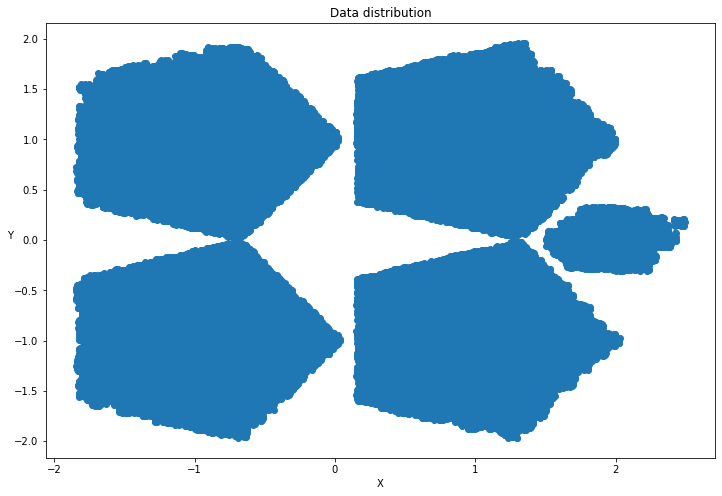

In [31]:
data2_30 = data2_cardinalities[30]
print('data1_30 shape:', data2_30.shape)

plt.figure(figsize=(12,8))
plt.scatter(data2_30[:,0], data2_30[:,1])
plt.title('Data distribution')
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.show()

In [32]:
for card, data2_ in data2_cardinalities.items():
    pd.DataFrame(data2_).to_csv('datasets/data2_' + str(card) + '.txt', header=False, index=False)

## Outlier insertion - Circle perimeter distribution

In this section, we devise a method for inserting outliers in our datasets.

Since our data is 2-dimensional and structured as displayed above, we can easily insert outliers in the form of a circle around them.

We devise a function for creating points, in the perimeter of a circle.

The function accepts mean points for the x and y dimensions (center of the circle), a radius, and a small amount of random deviation noise from the perimeter.

In [33]:
def circle_point(h, k, r, deviation=0.1):
    theta = np.random.random() * 2 * np.pi
    x = h + np.cos(theta) * r + np.random.random() * deviation * r
    y = k + np.sin(theta) * r + np.random.random() * deviation * r
    return x, y

### Data size 1

#### Original data

We create 30 outliers for our first dataset.

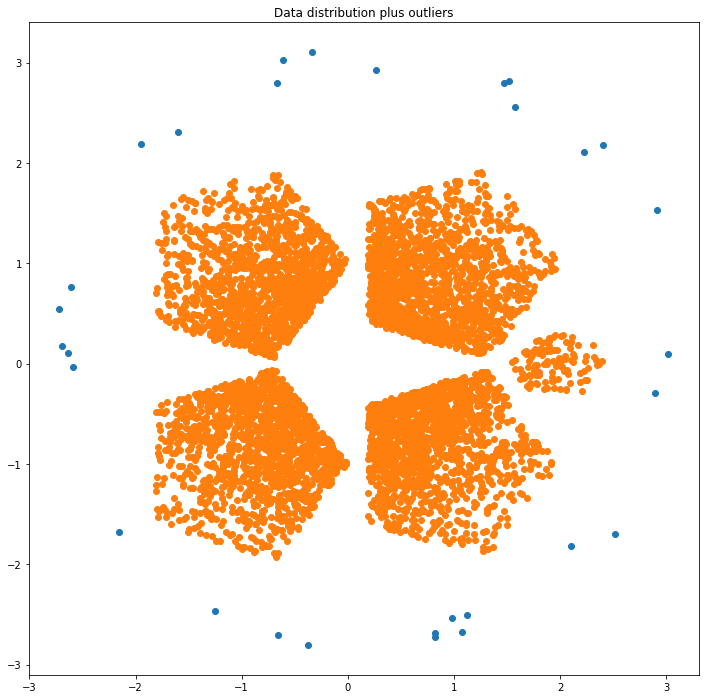

In [34]:
circular1 = np.array([circle_point(data1_mean[0], data1_mean[1], 2.9) for _ in range(30)])
plt.figure(figsize=(12,12))
plt.scatter(circular1[:,0], circular1[:,1])
plt.scatter(data1[:,0], data1[:,1])
plt.title("Data distribution plus outliers")
plt.show()

And save the original data along with the outliers in a new file.

In [35]:
data1_w_outliers = np.concatenate((data1, circular1)).round(5)
data1_w_outliers.shape

(5755, 2)

In [36]:
pd.DataFrame(data1_w_outliers).to_csv('datasets/data1_w_outliers.txt', header=False, index=False)

#### High cardinality data

We proceed to insert outliers to our higher cardinality data.

We define a number of outliers as a fraction of the dataset.

In [37]:
n_outliers = {k:int(v.shape[0] * 3e-4) for k,v in data1_cardinalities.items()}

In [38]:
n_outliers

{10: 17, 30: 51, 100: 171}

We create the outliers for each dataset

In [39]:
data1_cardinalities_w_outliers = {}
for card, data1_ in data1_cardinalities.items():
    data1_mean_ = data1_.mean(axis=0)
    circular1_ = np.array([circle_point(data1_mean_[0], data1_mean_[1], 2.9) for _ in range(n_outliers[card])])
    data1_cardinalities_w_outliers[card] = np.concatenate((data1_, circular1_)).round(5)

Let's take a look at our new data with outliers appended, for cardinality multiplied by 30.

The oultiers can be distinguished as the points in a circle around the pentagons.

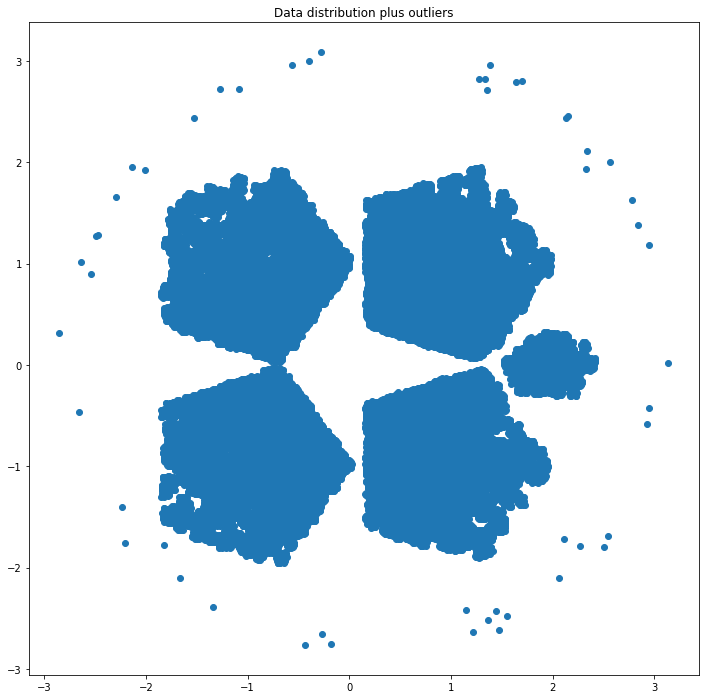

In [40]:
data1_30_w_outliers = data1_cardinalities_w_outliers[30]
plt.figure(figsize=(12,12))
plt.scatter(data1_30_w_outliers[:,0], data1_30_w_outliers[:,1])
plt.title("Data distribution plus outliers")
plt.show()

We save the new, higher-cardinality data with the outliers.

In [41]:
for card, data1_ in data1_cardinalities_w_outliers.items():
    pd.DataFrame(data1_).to_csv('datasets/data1_' + str(card) + '_w_outliers.txt', header=False, index=False)

### Data size 2

We perform a similar procedure for the second dataset.

#### Original data

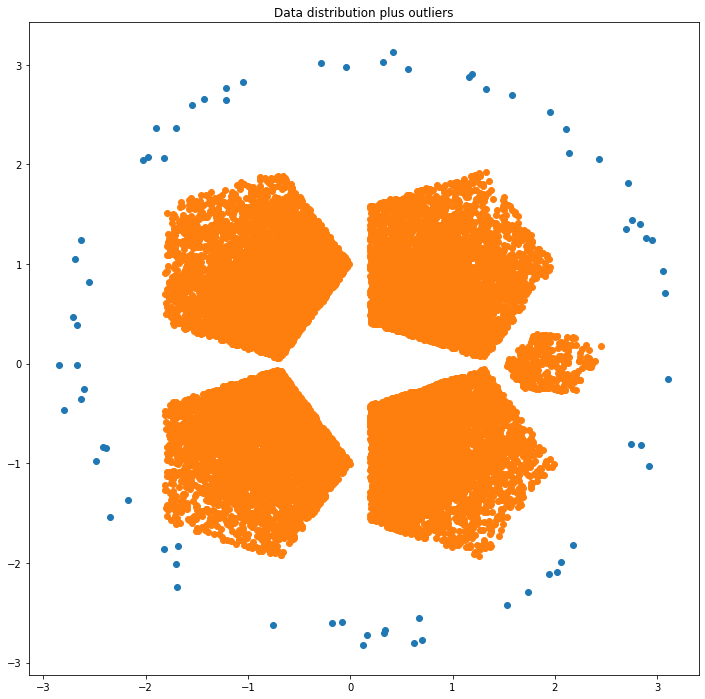

In [42]:
circular2 = np.array([circle_point(data2_mean[0], data2_mean[1], 2.9) for _ in range(70)])
plt.figure(figsize=(12,12))
plt.scatter(circular2[:,0], circular2[:,1])
plt.scatter(data2[:,0], data2[:,1])
plt.title("Data distribution plus outliers")
plt.show()

In [43]:
data2_w_outliers = np.concatenate((data2, circular2)).round(5)
data2_w_outliers.shape

(16994, 2)

In [44]:
pd.DataFrame(data2_w_outliers).to_csv('datasets/data2_w_outliers.txt', header=False, index=False)

#### High cardinality data

In [45]:
n_outliers = {k:int(v.shape[0] * 3e-4) for k,v in data2_cardinalities.items()}

In [46]:
n_outliers

{10: 50, 30: 152, 100: 507}

In [47]:
data2_cardinalities_w_outliers = {}
for card, data2_ in data2_cardinalities.items():
    data2_mean_ = data2_.mean(axis=0)
    circular2_ = np.array([circle_point(data2_mean_[0], data2_mean_[1], 2.9) for _ in range(n_outliers[card])])
    data2_cardinalities_w_outliers[card] = np.concatenate((data2_, circular2_)).round(5)

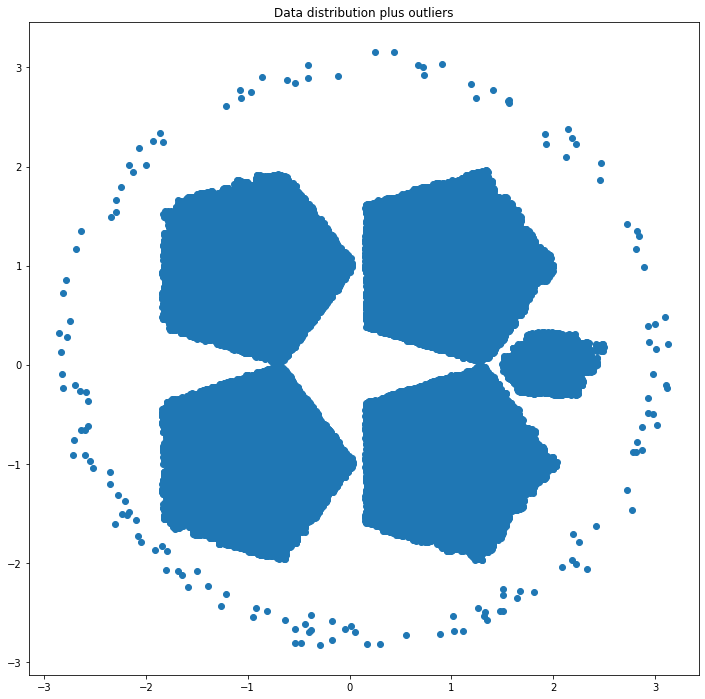

In [48]:
data2_30_w_outliers = data2_cardinalities_w_outliers[30]
plt.figure(figsize=(12,12))
plt.scatter(data2_30_w_outliers[:,0], data2_30_w_outliers[:,1])
plt.title("Data distribution plus outliers")
plt.show()

In [49]:
for card, data2_ in data2_cardinalities_w_outliers.items():
    pd.DataFrame(data2_).to_csv('datasets/data2_' + str(card) + '_w_outliers.txt', header=False, index=False)